# Exploratory data analysis

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [41]:
# Ruta a los datos raw rastreados por DVC
data_path = '../data/raw/Occupancy_Estimation.csv'

# Cargar los datos
df = pd.read_csv(data_path)

In [42]:
df.shape

(10129, 19)

In [43]:
# Descriptive statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
S1_Temp,10129.0,25.454012,0.351351,24.940000,25.190000,25.38,25.63,26.380000
S2_Temp,10129.0,25.546059,0.586325,24.750000,25.190000,25.38,25.63,29.000000
S3_Temp,10129.0,25.056621,0.427283,24.440000,24.690000,24.94,25.38,26.190000
S4_Temp,10129.0,25.754125,0.356434,24.940000,25.440000,25.75,26.00,26.560000
S1_Light,10129.0,25.445059,51.011264,0.000000,0.000000,0.00,12.00,165.000000
S2_Light,10129.0,26.016290,67.304170,0.000000,0.000000,0.00,14.00,258.000000
S3_Light,10129.0,34.248494,58.400744,0.000000,0.000000,0.00,50.00,280.000000
S4_Light,10129.0,13.220259,19.602219,0.000000,0.000000,0.00,22.00,74.000000
S1_Sound,10129.0,0.168178,0.316709,0.060000,0.070000,0.08,0.08,3.880000
S2_Sound,10129.0,0.120066,0.266503,0.040000,0.050000,0.05,0.06,3.440000


In [44]:
# Columns data types
df.dtypes

Date                     object
Time                     object
S1_Temp                 float64
S2_Temp                 float64
S3_Temp                 float64
S4_Temp                 float64
S1_Light                  int64
S2_Light                  int64
S3_Light                  int64
S4_Light                  int64
S1_Sound                float64
S2_Sound                float64
S3_Sound                float64
S4_Sound                float64
S5_CO2                    int64
S5_CO2_Slope            float64
S6_PIR                    int64
S7_PIR                    int64
Room_Occupancy_Count      int64
dtype: object

In [45]:
num_cols = ['S1_Temp','S2_Temp','S3_Temp','S4_Temp','S1_Light','S2_Light','S3_Light','S4_Light','S1_Sound','S2_Sound','S3_Sound','S4_Sound','S5_CO2','S5_CO2_Slope']
cat_cols = ['S6_PIR','S7_PIR','Room_Occupancy_Count']

In [46]:
# Columns with missing values
df.isna().sum()

Date                    0
Time                    0
S1_Temp                 0
S2_Temp                 0
S3_Temp                 0
S4_Temp                 0
S1_Light                0
S2_Light                0
S3_Light                0
S4_Light                0
S1_Sound                0
S2_Sound                0
S3_Sound                0
S4_Sound                0
S5_CO2                  0
S5_CO2_Slope            0
S6_PIR                  0
S7_PIR                  0
Room_Occupancy_Count    0
dtype: int64

In [47]:
df.nunique()

Date                        7
Time                    10129
S1_Temp                    24
S2_Temp                    69
S3_Temp                    29
S4_Temp                    27
S1_Light                   68
S2_Light                   82
S3_Light                  177
S4_Light                   75
S1_Sound                  231
S2_Sound                  185
S3_Sound                  258
S4_Sound                  106
S5_CO2                    186
S5_CO2_Slope             1579
S6_PIR                      2
S7_PIR                      2
Room_Occupancy_Count        4
dtype: int64

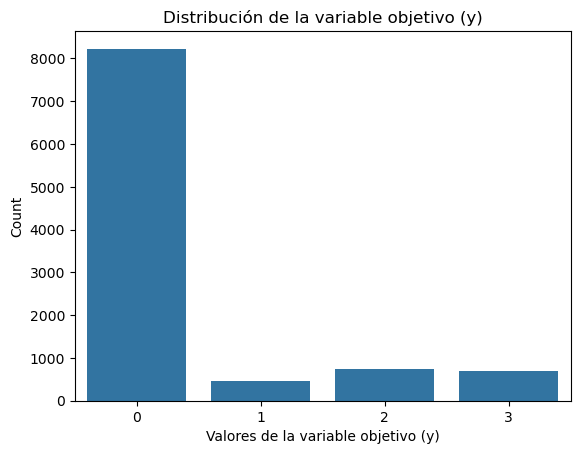

In [48]:
# Crear el countplot de la variable destino
sns.countplot(x='Room_Occupancy_Count', data=df)

# Añadir etiquetas y título
plt.xlabel('Valores de la variable objetivo (y)')
plt.ylabel('Count')
plt.title('Distribución de la variable objetivo (y)')
plt.show()

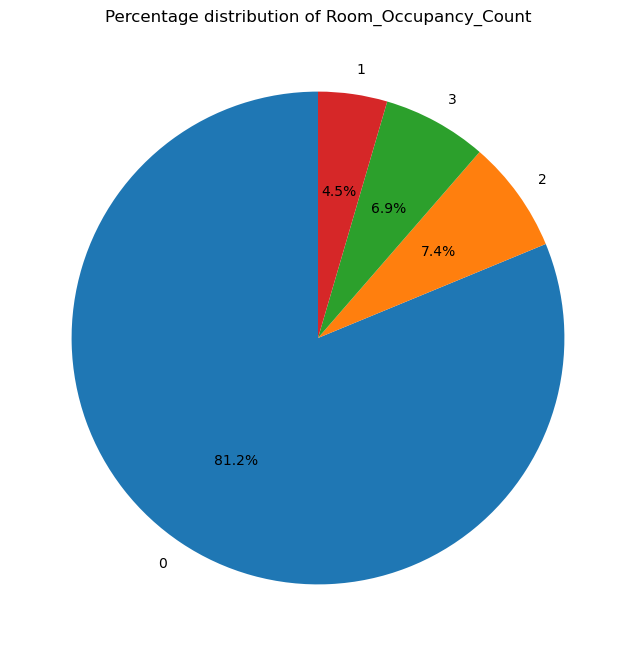

In [49]:
value_counts = df['Room_Occupancy_Count'].value_counts()

percentages = (value_counts / value_counts.sum()) * 100

plt.figure(figsize=(8, 8))
plt.pie(percentages, labels=percentages.index, autopct='%1.1f%%', startangle=90)
plt.title('Percentage distribution of Room_Occupancy_Count')
plt.show()

### Correlation between numerical features

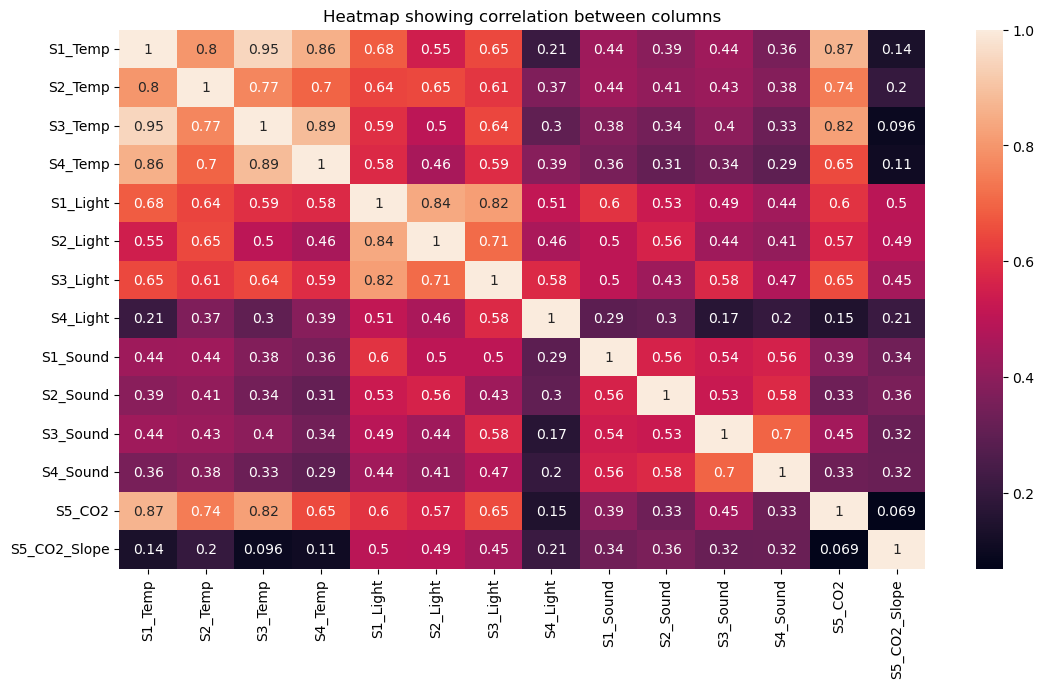

In [50]:
plt.figure(figsize=(13,7))
sns.heatmap(df[num_cols].corr(),annot = True)
plt.title('Heatmap showing correlation between columns')
plt.show()

### Date and Time exploration

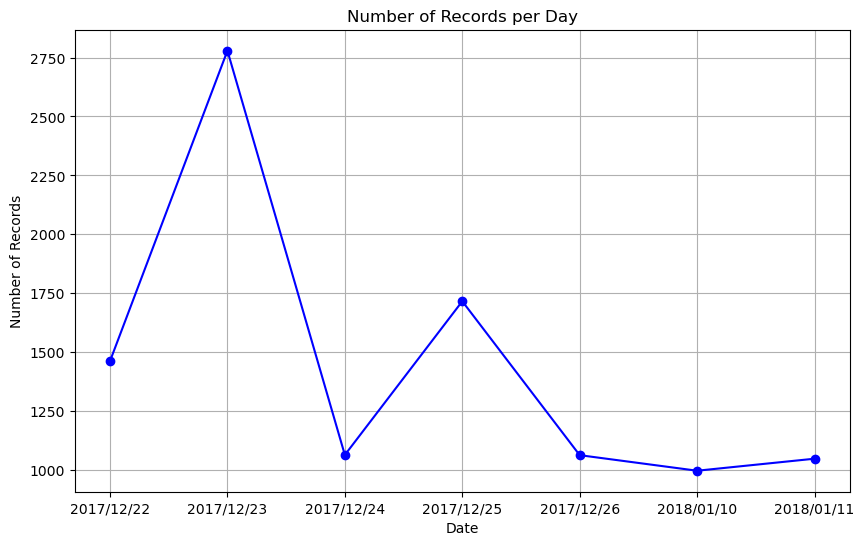

In [51]:

# Group by date and count the number of records for each day
daily_counts = df.groupby('Date').size().reset_index(name='count')
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(daily_counts['Date'], daily_counts['count'], marker='o', linestyle='-', color='b')
plt.title('Number of Records per Day')
plt.xlabel('Date')
plt.ylabel('Number of Records')
plt.grid(True)
plt.show()

In [52]:
df['Date_time'] = pd.to_datetime(df['Date'] +' '+ df['Time'])
dt_time = df.pop('Date_time')
df.insert(2, 'Date_time', dt_time)

df['Hours'] = df['Date_time'].dt.hour
df['Time_of_Day'] = pd.cut(df['Hours'], bins = [0,6,12,17,22,24], labels = ['Night','Morning','Afternoon','Evening','Night'], include_lowest=True, ordered = False)

df.pop('Hours')
day_time = df.pop('Time_of_Day')
df.insert(2, 'Time_of_Day', day_time)

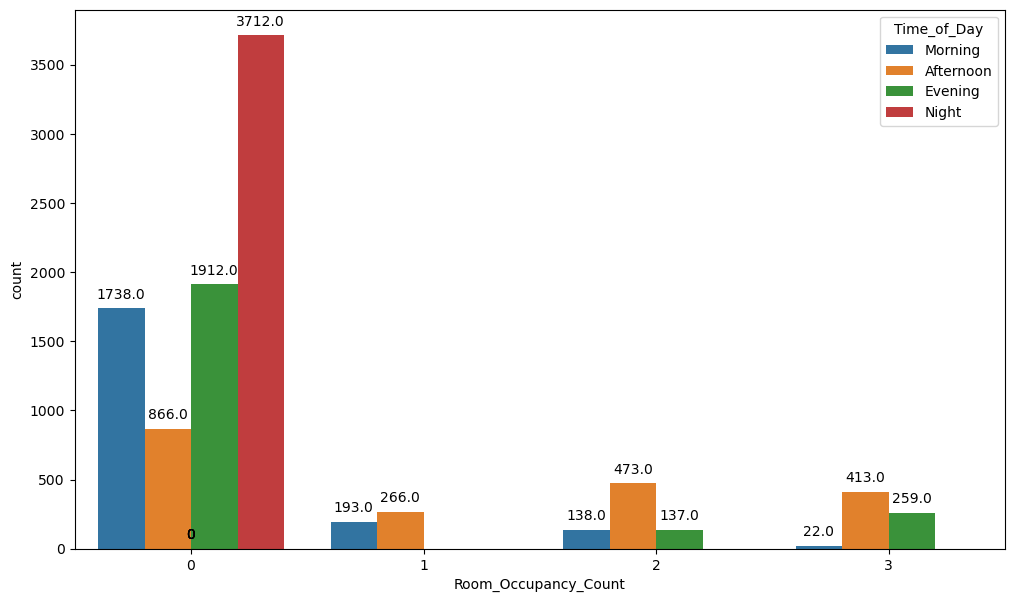

In [53]:

plt.figure(figsize=(12,7))
ax = sns.countplot(data = df,x = 'Room_Occupancy_Count', hue = 'Time_of_Day', hue_order = ['Morning','Afternoon','Evening','Night'])
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

In [54]:
# Group by date and time_of_day, calculate average room occupancy
avg_occupancy = df.groupby(['Date_time', 'Time_of_Day'], observed=False)['Room_Occupancy_Count'].mean().reset_index()

# Pivot the DataFrame for easier plotting
pivot_df = avg_occupancy.pivot(index='Date_time', columns='Time_of_Day', values='Room_Occupancy_Count')

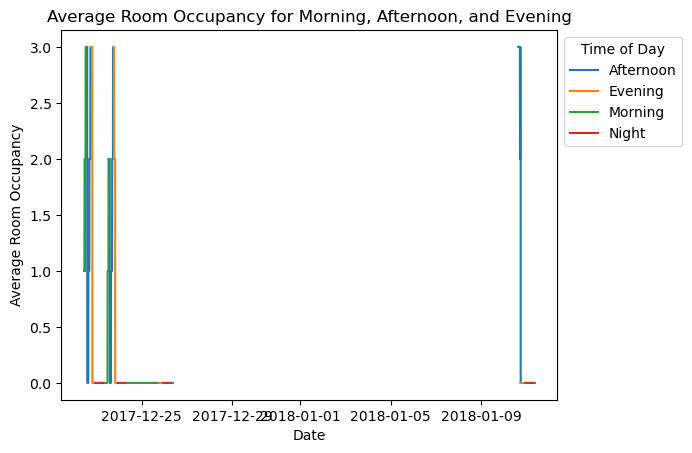

In [55]:
# Plot lines for each time of day
for time_of_day in pivot_df.columns:
    plt.plot(pivot_df.index, pivot_df[time_of_day], label=time_of_day)

plt.title('Average Room Occupancy for Morning, Afternoon, and Evening')
plt.xlabel('Date')
plt.ylabel('Average Room Occupancy')
plt.legend(title='Time of Day', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

## Boxplots for numerical columns

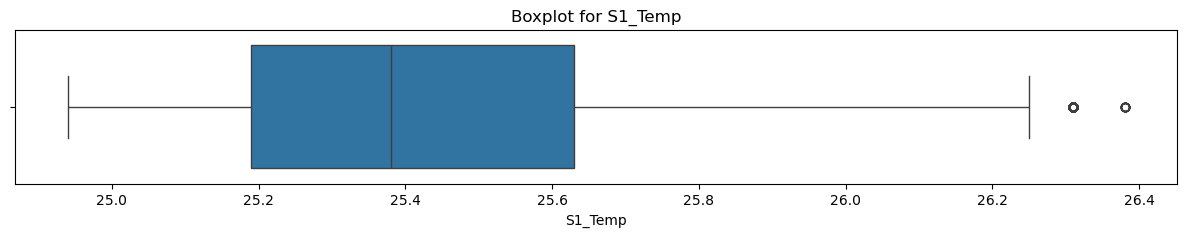

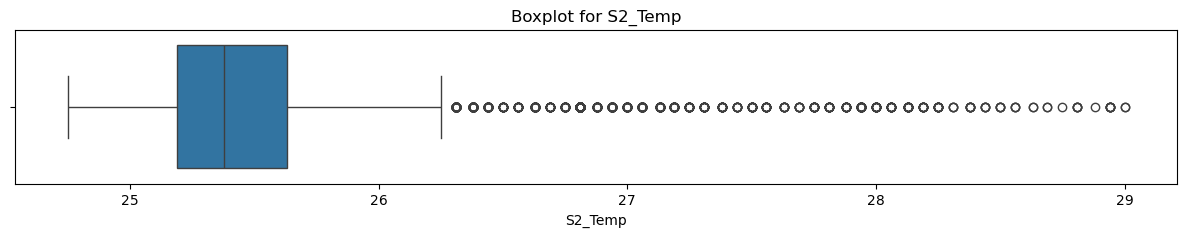

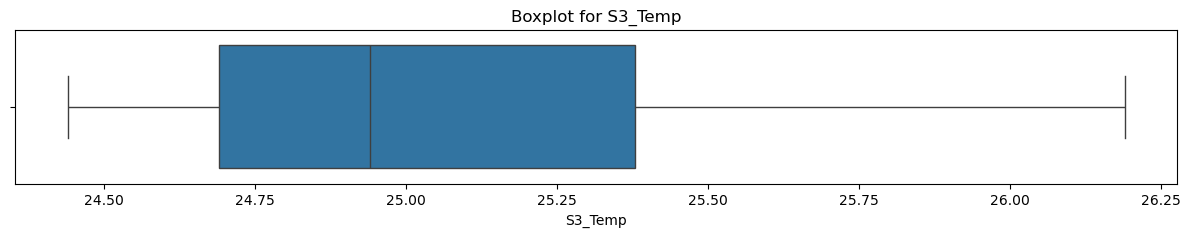

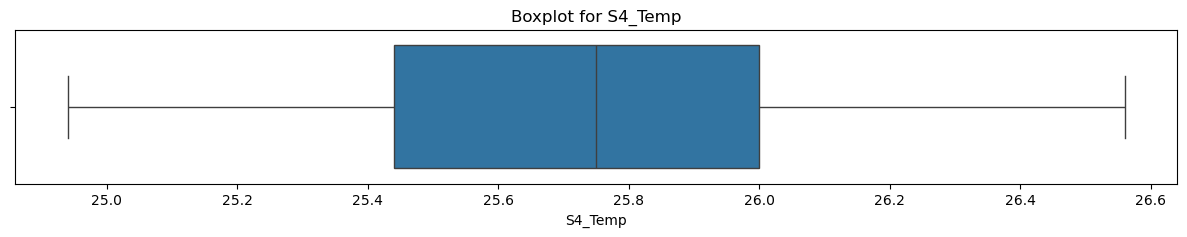

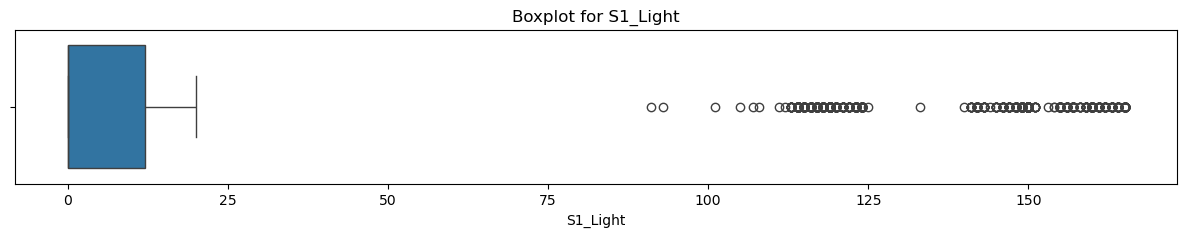

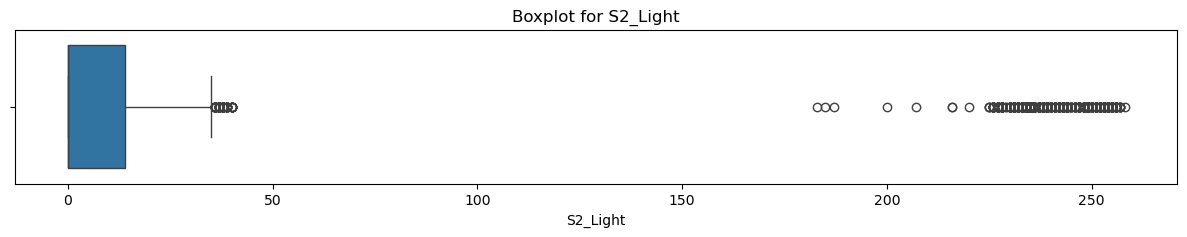

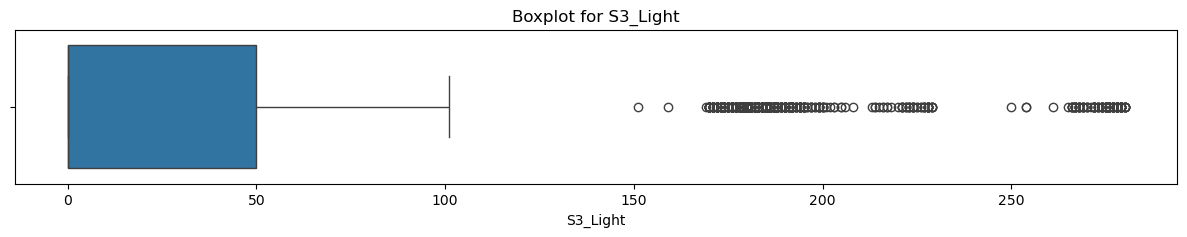

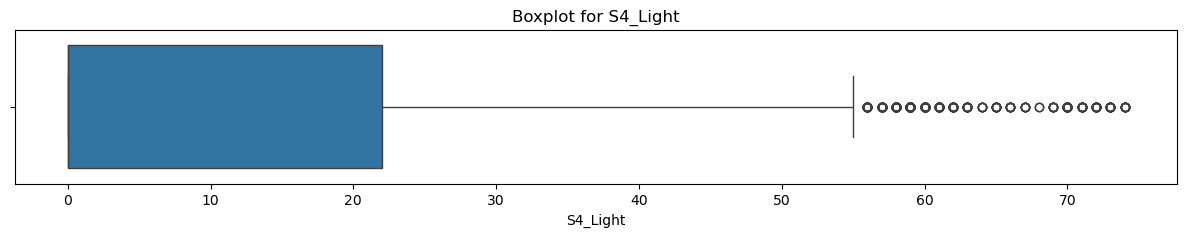

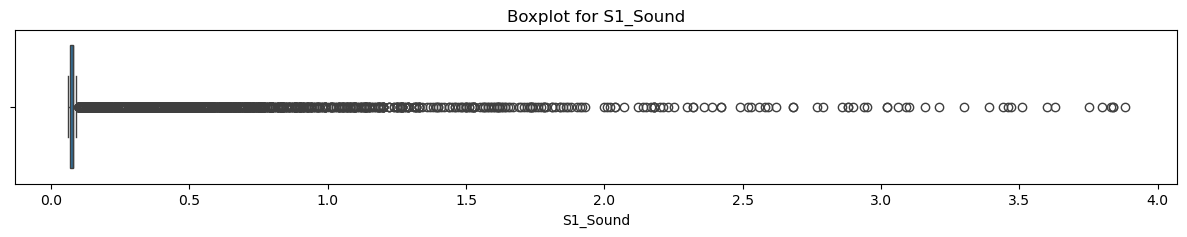

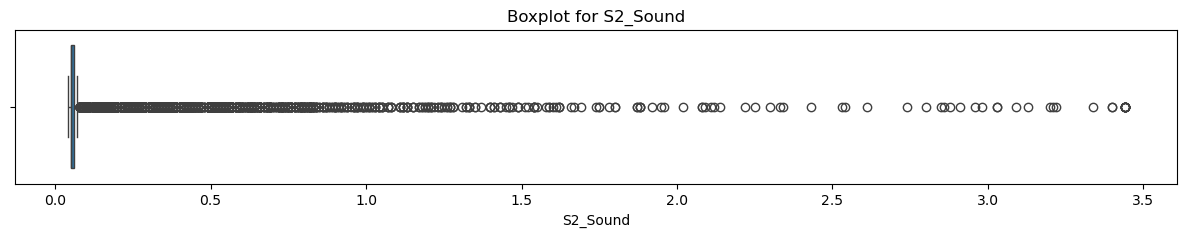

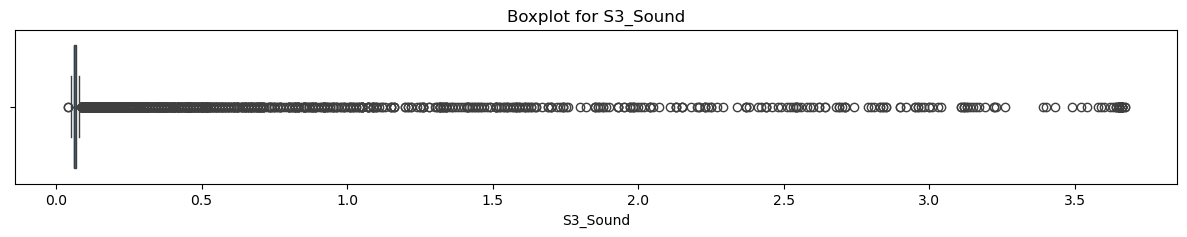

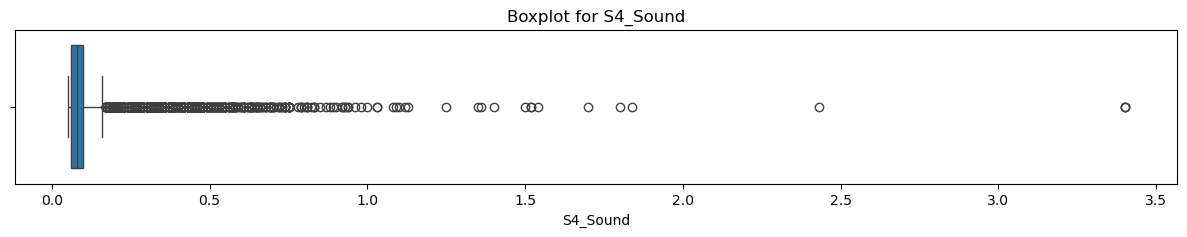

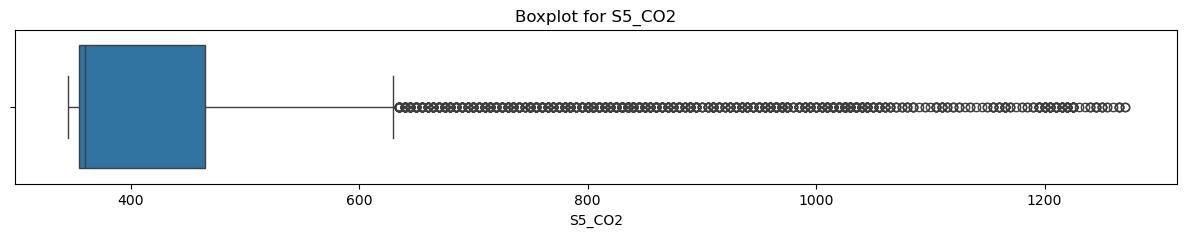

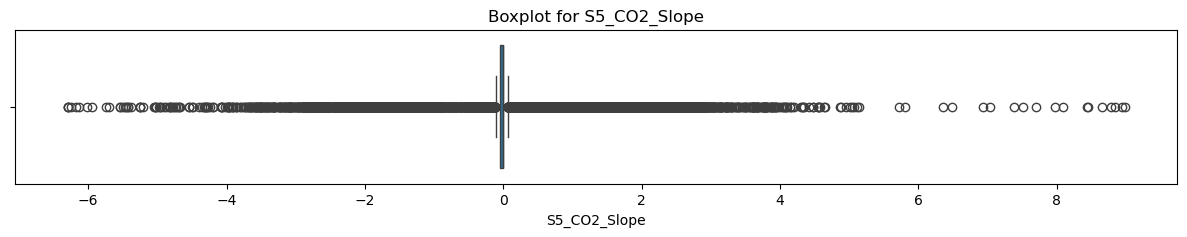

In [56]:

for i in num_cols:
  plt.figure(figsize=(15,2))
  sns.boxplot(data = df, x = i)
  plt.title('Boxplot for {}'.format(i))